<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2: Sistema Lineales e Invariantes en el Tiempo
#### Mora Taranilla

## Introducción
Un sistema se define como un grupo de elementos o componentes que opera sobre una o más señales de entrada (*inputs*) y produce una o más señales de salida (*outputs*). En el estudio de señales digitales discretas, un sistema aplica un algoritmo matemático que transforma la señal de entrada. 

\begin{equation}
T\{x[n]\}=y[n]
\end{equation}

Una clasificación dentro de los sistemas con los que trabajamos en procesamiento de señales son los **sistemas LTI**. Las características más relevantes de estos sistemas son:

- La linealidad se desglosa en dos principios: la homogeneidad y la aditividad. La homogeneidad implica que, si se ingresa una señal multiplicada por una constante, la salida se multiplica por la misma constante. Y la aditividad explica que, si se ingresa como entrada la suma de dos (o más) señales, la salida es la suma de las respuestas individuales. Estas características se reducen a la siguiente representación:

    Si  $T\{x_1[n]\} = y_1[n]$  y  $T\{x_2[n]\} = y_2[n]$, entonces

    \begin{equation}
    T\{\alpha \cdot x_1[n] + \beta \cdot x_2[n]\} = \alpha \cdot y_1[n] + \beta \cdot y_2[n]
    \end{equation}

- La invarianza en cuanto al tiempo. Un sistema invariante en el tiempo implica que no importa en qué tiempo absoluto se ingresa una señal; la salida del sistema es siempre la misma. Esto significa que, si se ingresa una señal desplazada en tiempo, se produce un desplazamiento también de la respuesta en la salida. Es decir, si $T\{x[n]\} = y[n]$, entonces si se ingresa $x[n+n_0]$ obtenemos lo siguiente.

    \begin{equation}
    T\{x[n+n_0]\} = y[n+n_0]
    \end{equation}

Otra característica relevante de los sistemas LTI es que se pueden representar totalmente por sus respuestas al impulso. Es decir que, si $x[n] = \delta[n]$, entonces $T\{\delta[n]\} = h[n]$. Llamamos a $h[n]$ la respuesta al impulso y define al sistema. Una vez que se obtiene la respuesta al impulso, se puede calcular cualquier respuesta a una señal mediante el producto de convolución entre la señal de entrada y $h[n]$. Mismo que plantear:

\begin{equation}
T\{x[n]\} = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
\end{equation}

Si tratamos con señales causales y finitas, es decir, que $x[n] = 0$ si  $n<0$  y $x[n] = 0$ si $n>N-1$, entonces los límites de la sumatoria se redefinen.

\begin{equation}
T\{x[n]\} = x[n] * h[n] = \sum_{k=0}^{N-1} x[k] \cdot h[n-k]
\end{equation}

Es importante aclarar que, si una señal de entrada es causal, la señal de salida también lo es. 

### Ecuaciones en diferencias
Las ecuaciones en diferencias son sistemas LTI. Estas ecuaciones representan ecuaciones diferenciales de señales discretas, utilizan valores anteriores de la señal de entrada y salida para calcular los siguientes valores. Siguen la siguiente estructura:

\begin{equation}
y[n] = \sum_{k=0}^{N} b_k \cdot x[n-k] + \sum_{k=1}^{M} a_k \cdot y[n-k]
\end{equation}

Donde a y b son vectores de coeficientes constantes. Es importante notar que la sumatoria de los términos recursivos de $y[n]$ comienza en 1, ya que la sumatoria no puede contener un valor no definido. Si la ecuación en diferencias no tiene término recursivo, entonces estamos hablando de un *sistema de respuesta al impulso finita (FIR)*. Por otro lado, si contiene el término de retroalimentación, se puede obtener un vector infinito si es que se elige $M = \infty$, de esta manera tenemos un *sistema IIR*. 

## Análisis y desarrollo del trabajo
Para llevar a cabo el trabajo, utilicé las librerías *scipy.signal, numpy y matplotlib.pyplot*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sign

### Primera ecuación
En base a la siguiente ecuación en diferencias  $y[n]=3⋅10^{−2}⋅x[n]+5⋅10^{−2}⋅x[n−1]+3⋅10^{−2}⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]$  que modela un sistema LTI, se solicitaba graficar las señales de salida de las señales generadas en el TS1, hallar la respuesta al impulso y repetir la generación de salida para algunas de las señales anteriores. Por lo tanto, importé definiciones propias para las señales cuadradas y senoidales utilizadas en el TS1 y las señales generadas.

Para todas las señales, menos el pulso de *10 ms*, utilicé 1000 muestras (*N=1000*) y una frecuencia de muestreo de *400 kHz* para poder visualizar y analizar fácilmente los gráficos. De esta forma obtenemos un tiempo de simulación de *0,0025 segundos*. En el caso del pulso, mantuve la misma cantidad de muestras, pero realicé una disminución de la frecuencia de muestreo a *40 kHz*, obteniendo un tiempo de simulación de *0,025 segundos*.

In [2]:
def mi_funcion_sen(ff, nn, amp = 1, dc = 0, ph = 0, fs = 2): 
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = N * Ts # segundos
    
    tt = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xx = amp * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    
    return tt, xx

def mi_funcion_cuadrada (ff, nn, amp = 1, dc = 0, ph = 0, fs = 2):
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tt = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xc = amp * np.sign(np.sin( 2 * np.pi * ff * tt + ph ) + dc) #utilizo la funcion sign, que me devuelve -1 para valores negativos, 1 para positivos y 0 para 0.
    
    return tt, xc

# Defino fs y N
fs = 400000
Ts = 1/fs
N = 1000
T_simulacion = N/fs

# Señales de TS1
tt, x1 = mi_funcion_sen(ff = 2000, nn = N, fs = fs)

tt, x2 = mi_funcion_sen(ff = 2000, nn = N, amp = 2, ph = np.pi/2, fs = fs)

tt, xaux = mi_funcion_sen(ff = 1000, nn = N, fs = fs)
x3 = x1 * xaux

a4 = 1*0.75 #reduzco la amplitud en un 75%
x4 = np.clip(x1, -a4, a4)

tt, x5 = mi_funcion_cuadrada (ff = 4000, nn = N, fs = fs)

fs6 = 40000
T_sim_6 = N/fs6
t6=np.arange(start=0 ,stop=T_sim_6 , step=1/fs6)
x6=np.zeros(N)
x6[0:400]=1

Para llevar a cabo el trabajo, decidí realizar una función propia que devuelva la señal de salida para cualquier ecuación de diferencias que siga el modelo $y[n] = \sum_{k=0}^{N} b_k \cdot x[n-k] + \sum_{k=1}^{M} a_k \cdot y[n-k]$. 

In [3]:
def ec_diferencias (xx, aa, bb):
    nn = len(bb)
    mm = len(aa)
    Y = np.zeros(len(xx))
    
    for n in range (len(xx)):
        y_x = 0 #Inicializo las sumas para cada n
        y_y = 0
        for k in range(nn):
            if n-k >= 0: # Por causalidad, los valores de xx[n-k] con k>n son cero, por lo tanto no aportan a la sumatoria.
                y_x += bb[k] * xx[n-k]
        for k in range(mm): 
            if n-k-1 >= 0: 
                y_y += aa[k] * Y[n-1-k]
        
        Y[n] = y_x + y_y
        
    return Y

Como parámetros de entrada tenemos:

- *xx*: Señal de entrada.
- *aa*: Vector de coeficientes constantes que multiplican a los términos de retroalimentación.
- *bb*: Vector de coeficientes constantes que multiplican a los términos de la señal de entrada.

Y como resultado obtenemos la señal de salida (*Y*) de nuestro sistema, con la misma longitud que la señal de entrada.

#### Señales de TS1
A partir de esta definición, realicé el calculo de la salida de las señales del TS1. Las señales de salida, por la definición de la ecuación, tienen una misma frecuencia de muestreo y tiempo de simulación que las señales de entrada. Además, calcule la energía y la potencia de las señales de salida.

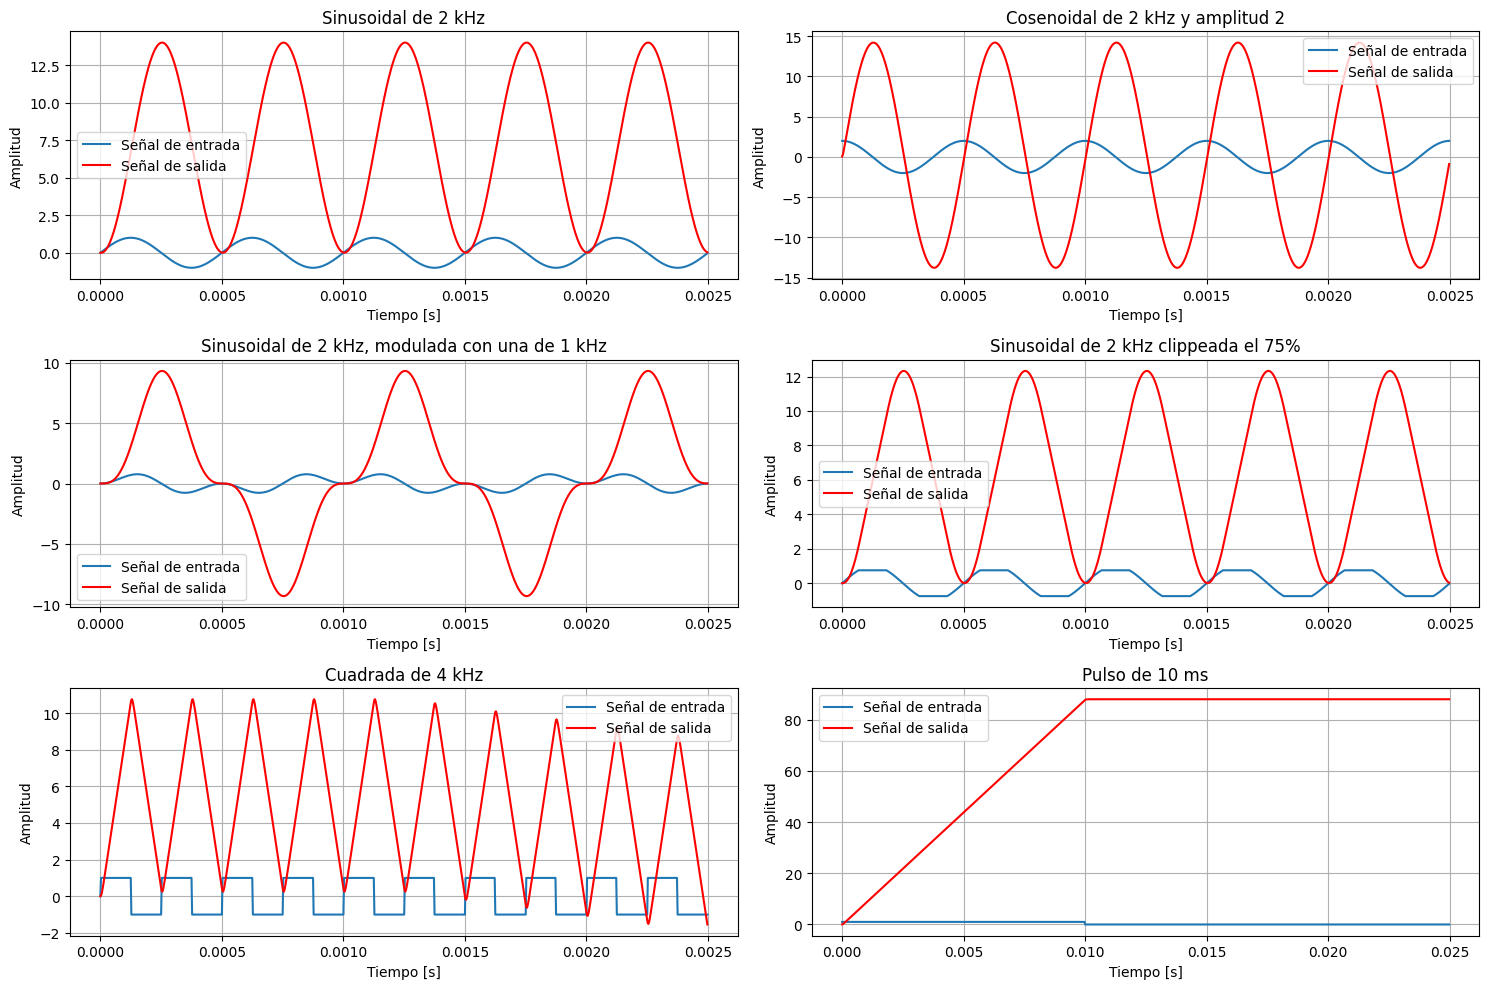

La potencia de la señal de salida para la sinusoidal de 2 kHz es: 73.491649463968 W
La potencia de la señal de salida para la cosenoidal de 2 kHz y amplitud 2 es: 97.89112704015186 W
La potencia de la señal de salida para la sinusoidal de 2 kHz modulada con otra de 1 kHz es: 27.214425668782038 W
La potencia de la señal de salida para la sinusoidal de 2 kHz clippeada es: 55.96264646814457 W
La energía de la señal de salida para la señal cuadrada de 2 kHz es: 34967.47906666665 J
La energía de la señal de salida para el pulso de 10 ms es: 5667271.446666679 J


In [4]:
# Defino los vectores de coeficientes de la ecuación
aa = [1.5, -0.5]
bb = [3*(10**-2), 5*(10**-2), 3*(10**-2)]

Y1 = ec_diferencias (x1,aa,bb)
Y2 = ec_diferencias (x2,aa,bb)
Y3 = ec_diferencias (x3,aa,bb)
Y4 = ec_diferencias (x4,aa,bb)
Y5 = ec_diferencias (x5,aa,bb)
Y6 = ec_diferencias (x6,aa,bb)

#Grafico las señales de entrada y salida
plt.figure(1, figsize=(15, 10))

plt.subplot(3,2,1)
plt.plot(tt, x1, label='Señal de entrada')
plt.plot(tt, Y1, label='Señal de salida', color='red')
plt.title('Sinusoidal de 2 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(tt, x2, label='Señal de entrada')
plt.plot(tt, Y2, label='Señal de salida', color='red')
plt.title('Cosenoidal de 2 kHz y amplitud 2')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(tt, x3, label='Señal de entrada')
plt.plot(tt, Y3, label='Señal de salida', color='red')
plt.title('Sinusoidal de 2 kHz, modulada con una de 1 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(tt, x4, label='Señal de entrada')
plt.plot(tt, Y4, label='Señal de salida', color='red')
plt.title('Sinusoidal de 2 kHz clippeada el 75%')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(tt, x5, label='Señal de entrada')
plt.plot(tt, Y5, label='Señal de salida', color='red')
plt.title('Cuadrada de 4 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(t6, x6, label='Señal de entrada')
plt.plot(t6, Y6, label='Señal de salida', color='red')
plt.title('Pulso de 10 ms')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

## Potencia y energía.
def potencia(xx, periodo):
    pot = 0
    for k in range(periodo):
        pot += (xx[k])**2
    
    pot = pot/periodo
    
    return pot

def energia (xx):
    E=0
    long = len(xx)
    for k in range(long):
        E = E + (xx[k])**2
    return E


# Y1 tiene periodo 0.0005s (200 muestras)
potY1 = potencia(Y1, 200)
potY2 = potencia(Y2, 200)
potY3 = potencia(Y3, 400)
potY4 = potencia(Y4, 200)
enerY5 = energia(Y5)
enerY6 = energia(Y6)

print(f'La potencia de la señal de salida para la sinusoidal de 2 kHz es: {potY1} W')
print(f'La potencia de la señal de salida para la cosenoidal de 2 kHz y amplitud 2 es: {potY2} W')
print(f'La potencia de la señal de salida para la sinusoidal de 2 kHz modulada con otra de 1 kHz es: {potY3} W')
print(f'La potencia de la señal de salida para la sinusoidal de 2 kHz clippeada es: {potY4} W')
print(f'La energía de la señal de salida para la señal cuadrada de 2 kHz es: {enerY5} J')
print(f'La energía de la señal de salida para el pulso de 10 ms es: {enerY6} J')

##### Análisis de los resultados
En el caso del gráfico de la sinusoidal de 2 kHz, se puede analizar de manera sencilla cuál es la salida. Se observa una señal periódica del mismo periodo que la senoidal, es decir, la misma frecuencia, y de amplitud visiblemente mayor. Al comenzar en valor cero y crecer hasta alcanzar una amplitud de 14, se puede decir que la misma puede verse como una cosenoidal desfasada en π, centrada en 7. Para terminar de confirmarlo, decidí llevar a cabo una prueba y verificar si es que esto se cumplía.

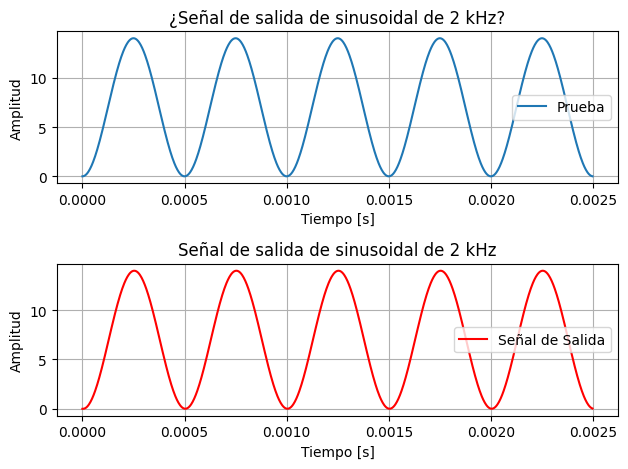

In [5]:
tprueba, xprueba = mi_funcion_sen(ff = 2000, nn = N, amp = 7, dc = 7, ph = 3*np.pi/2, fs = fs)

plt.figure(2)

plt.subplot(2,1,1)
plt.plot(tprueba, xprueba, label='Prueba')
plt.title('¿Señal de salida de sinusoidal de 2 kHz?')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tt, Y1, label='Señal de Salida', color='red')
plt.title('Señal de salida de sinusoidal de 2 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

Este resultado refleja que sí se cumple la igualdad. De esta manera, se logró obtener una descripción completa de la señal de salida para el caso de la sinusoidal.

En cuanto a la señal cosenoidal, se puede observar, al igual que con la senoidal, que la salida es una señal periódica. A simple vista se observa que la amplitud de la salida es del doble que en el caso de la senoidal, lo cual era esperado debido a la propiedad de linealidad de este tipo de sistemas. En este caso, la salida es una senoidal de amplitud 14, centrada en 0 y conserva la misma frecuencia que la señal de entrada. 

Se cumplen patrones para todos los casos:

- Si la entrada es una señal periódica, la señal de salida también lo es.
- La amplitud de las señales de salida es significativamente mayor que las señales de entrada.

### Respuesta al impulso
Tal como fue mencionado anteriormente, un sistema LTI se puede describir de manera completa conociendo únicamente la respuesta al impulso. Una vez que se obtiene la respuesta al impulso, que es simplemente ingresando como entrada $\delta [n]$, se puede conocer cualquier señal de salida mediante el producto de convolución.

Por lo tanto, definí mi propia función $\delta [n]$, siguiendo la definición para señales discretas, y la ingresé a la ecuación de diferencias. Grafiqué ambos resultados.

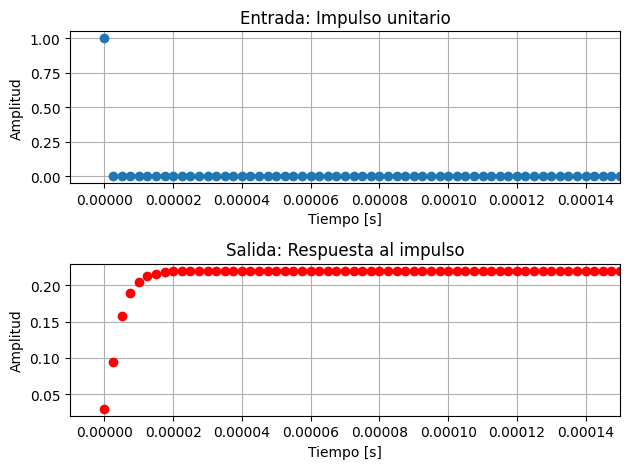

In [6]:
def delta(nn, k = 0):
    d = np.zeros(nn)
    d[k] = 1
    return d

imp = delta(N)

h1 = ec_diferencias(imp,aa,bb)

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(tt, imp, 'o')
plt.title('Entrada: Impulso unitario')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim([-0.00001,0.00015])
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tt, h1,'o', color='red')
plt.title('Salida: Respuesta al impulso')
plt.grid(True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim([-0.00001,0.00015])

plt.tight_layout()

plt.show()

Se puede observar en el gráfico que la función realizada para $\delta [n]$ cumple con el comportamiento esperado. Por otro lado, realicé el cálculo a mano de la respuesta al impulso esperado para los primeros valores del vector para verificar que la ecuación funciona de manera adecuada. 

$$
\delta[n] =
\begin{cases}
1 &    n = 0 \\
0 &    n \neq 0 \\
\end{cases}
$$

Comienzo a calcular: $h[n]=3⋅10^{−2}⋅\delta[n]+5⋅10^{−2}⋅\delta[n−1]+3⋅10^{−2}⋅\delta[n−2]+1.5⋅h[n−1]−0.5⋅h[n−2]$

$$
h[0] = 3⋅10^{−2}⋅\delta[0] = 0.03
$$
$$
h[1] = 3⋅10^{−2}⋅\delta[1] + 5⋅10^{−2}⋅\delta[0] + 1.5⋅h[0] = 0.05 + 1.5⋅0.03 = 0.095
$$
$$
h[2] = 3⋅10^{−2}⋅\delta[2] + 5⋅10^{−2}⋅\delta[1] + 3⋅10^{−2}⋅\delta[0] + 1.5⋅h[1] − 0.5⋅h[0] = 0.03 + 1.5⋅0.095 - 0.5⋅0.03 = 0.1575
$$

Desde este momento en adelante, todos los términos de $\delta[n]$ no contribuyen a la sumatoria, por lo que solo utilizo los términos recursivos.

$$
h[3] = 1.5 \cdot 0.1575 - 0.5 \cdot 0.095 = 0.18875
$$
$$
h[4] = 1.5 \cdot 0.18875 - 0.5 \cdot 0.1575 = 0.202375
$$
$$
h[5] = 1.5 \cdot 0.202375 - 0.5 \cdot 0.18875 = 0.2121875
$$

Con los valores encontrados, es posible comparar con los resultados obtenidos de manera digital.

$$
h[0:5] = [0.03, 0.095, 0.1575, 0.18875, 0.202375, 0.2121875]
$$

In [7]:
for n in range(6):
    print(f'{h1[n]:.7f}')

0.0300000
0.0950000
0.1575000
0.1887500
0.2043750
0.2121875


En base a los resultados obtenidos, podemos decir que la función planteada en un principio genera la salida esperada para el impulso. 

A partir de la respuesta al impulso, verifico que cumpla su función de manera adecuada, calculando el output para algunas de las señales realizadas anteriormente. Utilicé la función  *convolve*  de  *scipy.signal*. Esta función realiza la convolución de dos vectores de misma longitud, en este caso *N = 1000* . Al utilizar el modo predeterminado, se realiza la convolución completa (mode = *'full'*), devolviendo un vector de longitud *2N-1*, y la máquina decide si lo realiza de manera directa, por la definición de sumatoria, o por FFT.

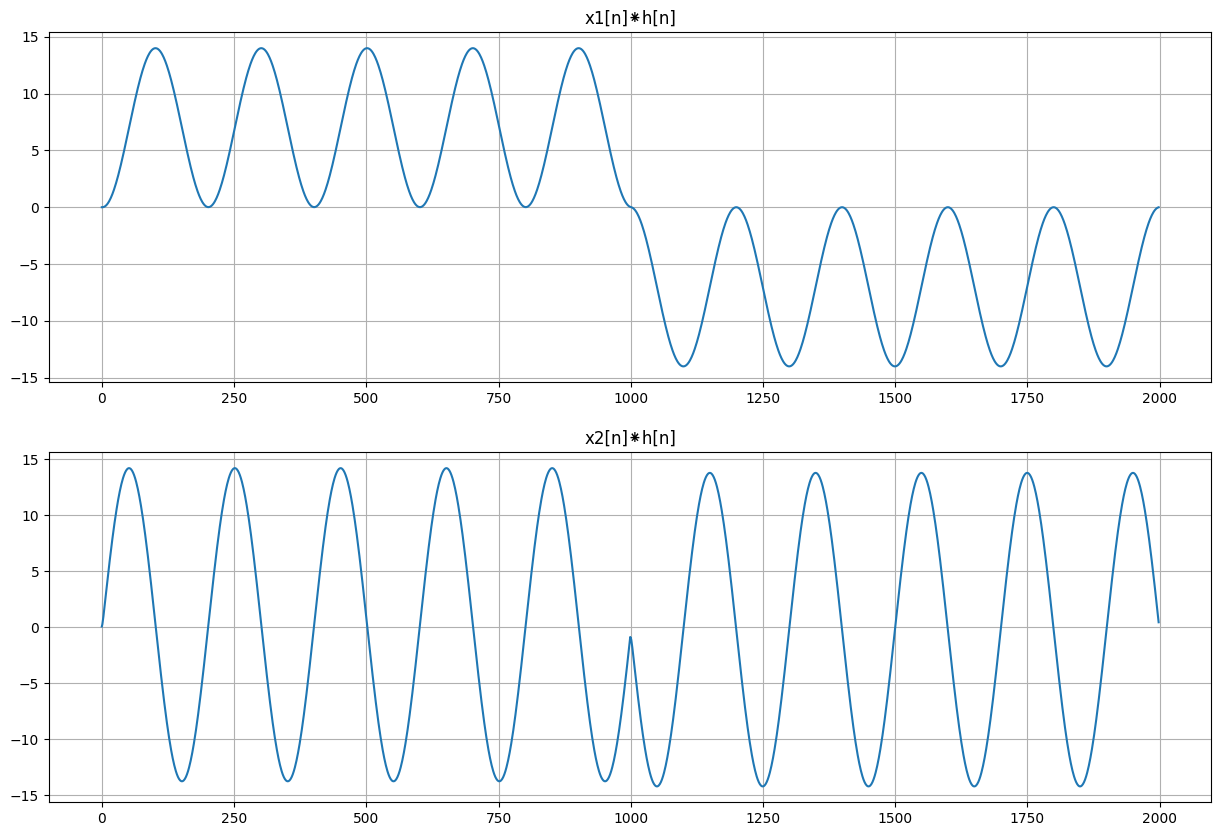

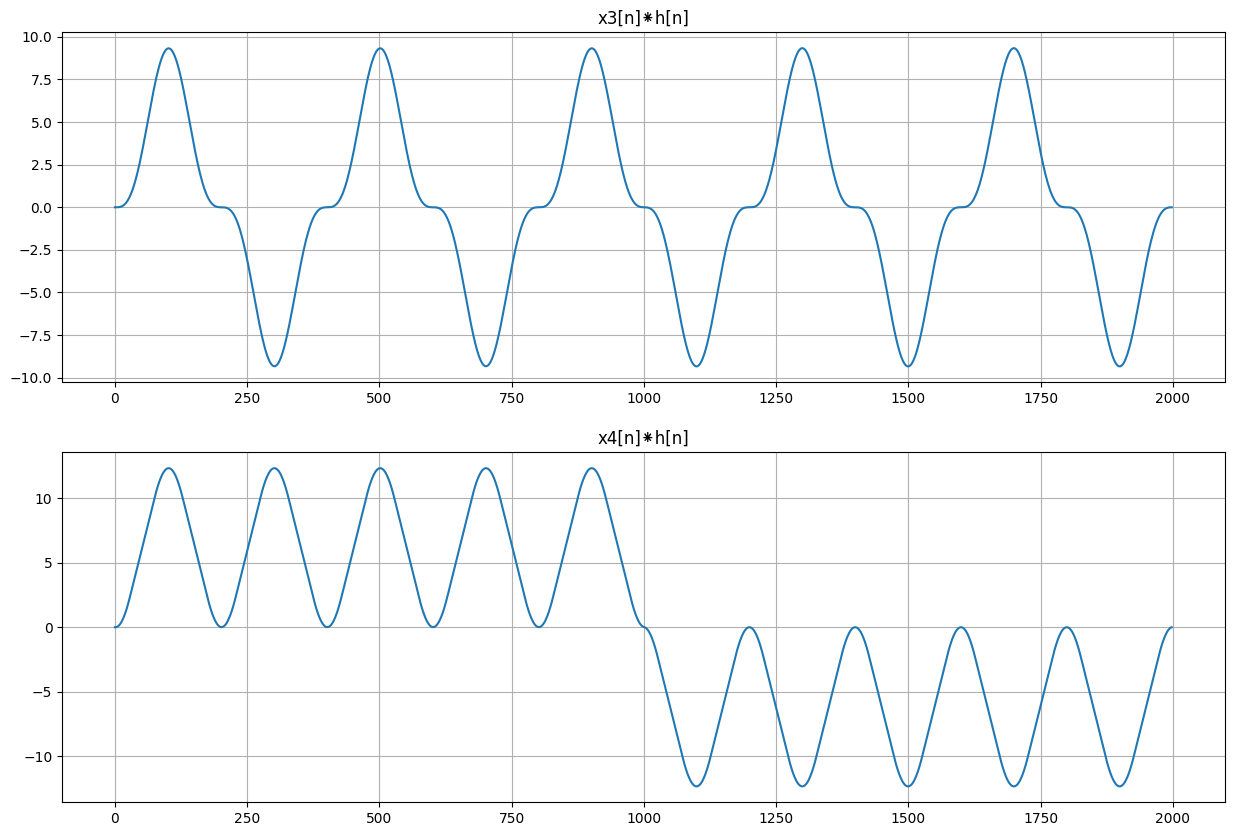

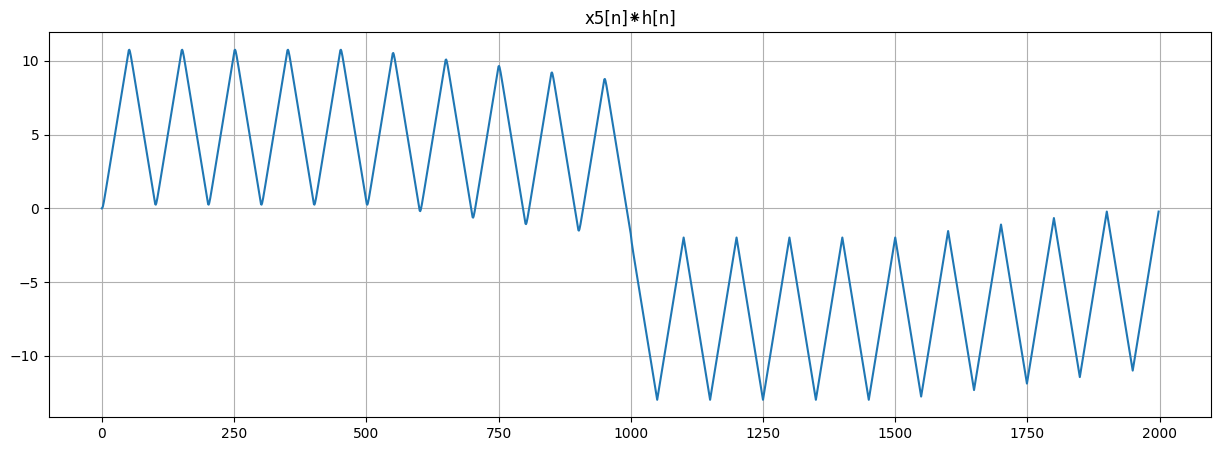

In [8]:
Y1vol2 = sign.convolve(x1,h1)
Y2vol2 = sign.convolve(x2,h1) 
Y3vol2 = sign.convolve(x3,h1)
Y4vol2 = sign.convolve(x4,h1)
Y5vol2 = sign.convolve(x5,h1)

plt.figure(4, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(Y1vol2)
plt.title('x1[n]⁕h[n]')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(Y2vol2)
plt.title('x2[n]⁕h[n]')
plt.grid(True)

plt.show()

plt.figure(5, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(Y3vol2)
plt.title('x3[n]⁕h[n]')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(Y4vol2)
plt.title('x4[n]⁕h[n]')
plt.grid(True)

plt.show()

plt.figure(6, figsize=(15,5))

plt.plot(Y5vol2)
plt.title('x5[n]⁕h[n]')
plt.grid(True)

plt.show()



Se puede observar que las señales de salida son del doble de longitud que las calculadas anteriormente; esto se debe a la función utilizada. En nuestro caso, solo necesitamos los primeros 1000 valores para poder comparar los resultados. Es por ello que recorto los vectores.

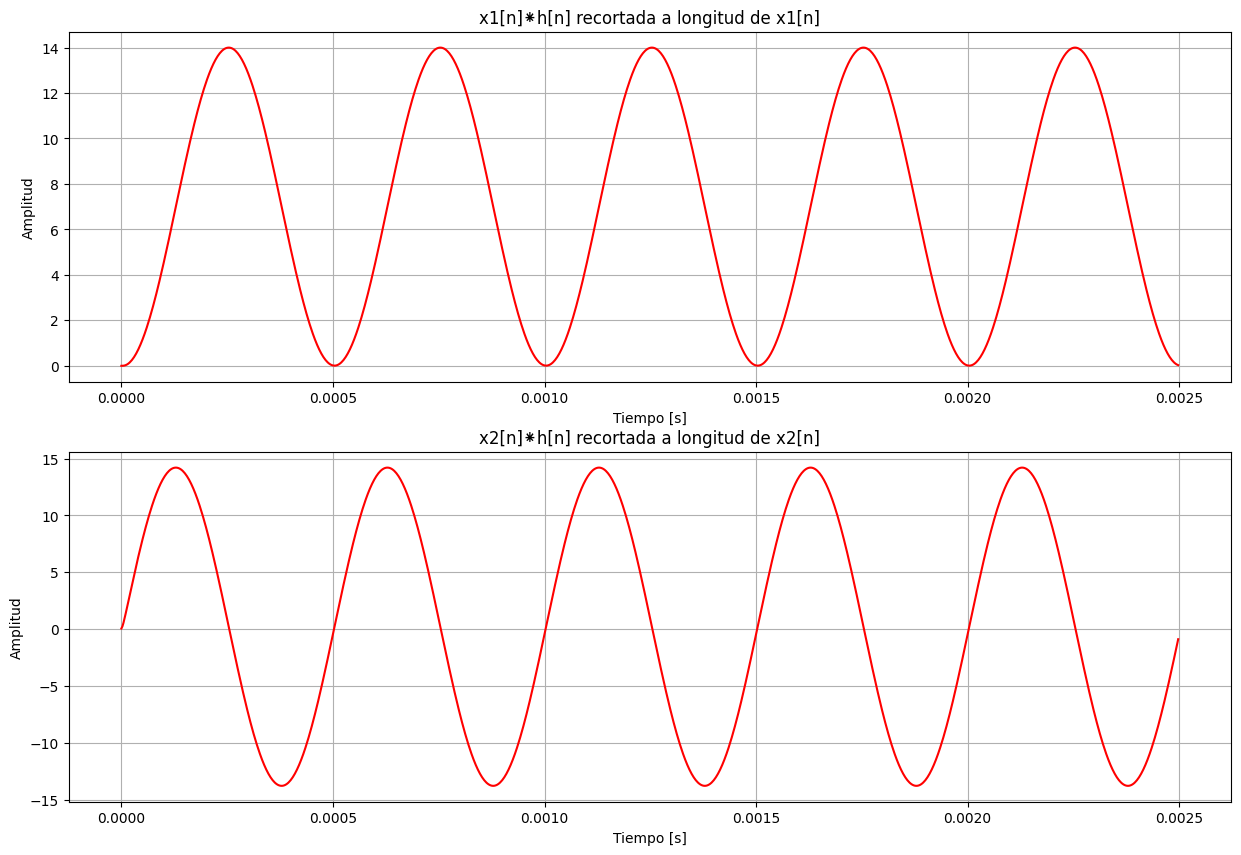

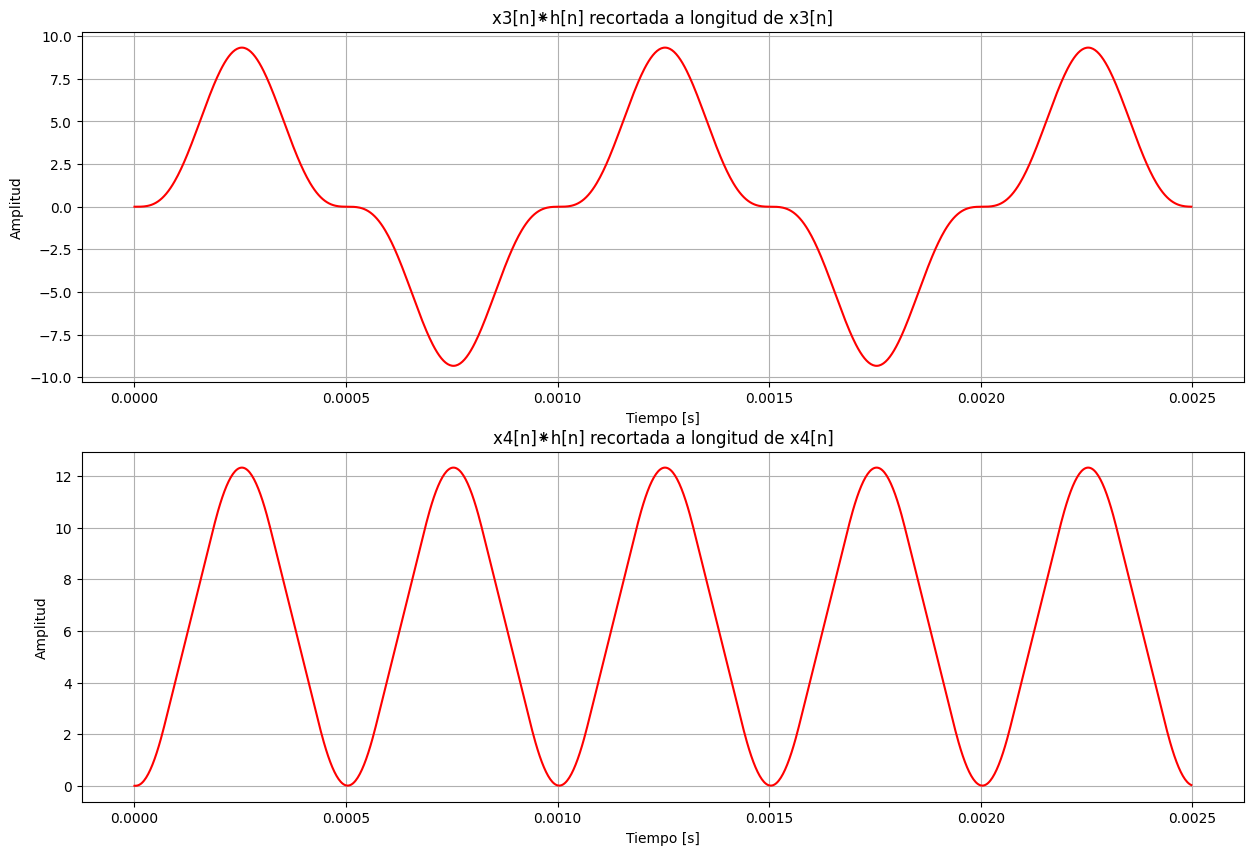

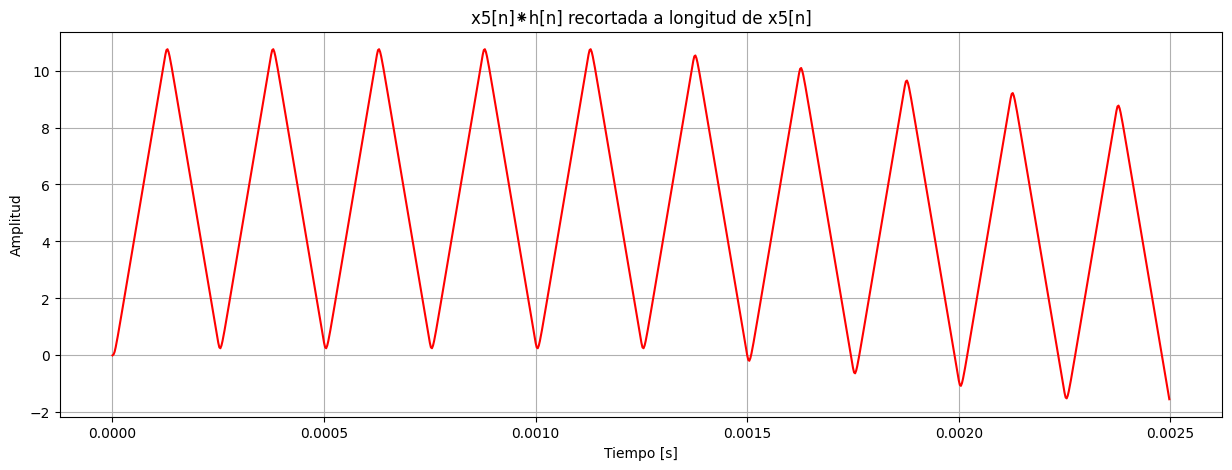

In [9]:
Y1vol2_cort = Y1vol2[:len(x1)]
Y2vol2_cort = Y2vol2[:len(x2)] 
Y3vol2_cort = Y3vol2[:len(x3)]
Y4vol2_cort = Y4vol2[:len(x4)]
Y5vol2_cort = Y5vol2[:len(x5)]

plt.figure(8, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(tt, Y1vol2_cort, color='red')
plt.title('x1[n]⁕h[n] recortada a longitud de x1[n]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tt, Y2vol2_cort, color='red')
plt.title('x2[n]⁕h[n] recortada a longitud de x2[n]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()

plt.figure(8, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(tt, Y3vol2_cort, color='red')
plt.title('x3[n]⁕h[n] recortada a longitud de x3[n]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tt, Y4vol2_cort, color='red')
plt.title('x4[n]⁕h[n] recortada a longitud de x4[n]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()

plt.figure(9, figsize=(15,5))
plt.plot(tt, Y5vol2_cort, color='red')
plt.title('x5[n]⁕h[n] recortada a longitud de x5[n]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()

En base a los gráficos obtenidos, se puede observar y confirmar que se obtienen los mismos resultados. Una señal de salida, entonces, se puede obtener de ambas formas: ingresando la señal a la ecuación de diferencias o realizando la convolución con la respuesta al impulso.

### Segunda y tercera ecuación
En este segundo apartado, se solicitaba hallar la respuesta al impulso y la salida de una señal sinusoidal en los sistemas definidos por las siguientes ecuaciones:

- $y[n]=x[n]+3⋅x[n−10]$
- $y[n]=x[n]+3⋅y[n−10]$

A simple vista, es fácil notar que estas ecuaciones tienen una gran diferencia: en un caso no tenemos término recursivo (*FIR*) y en el otro sí (*IIR*). En caso de FIR, vamos a observar que a partir de cierto punto, los valores de la respuesta al impulso se convierten en cero, ya que para cualquier $n>10$, todo valor de $\delta [n]$ es cero. Por otro lado, en caso de IIR, cada 10 muestras, vamos a encontrar un nuevo valor 3 veces mayor que el anterior valor distinto de cero. A continuación veremos esto de manera gráfica. 

Al haber definido anteriormente una función que permite cualquier ecuación de diferencias para señales causales, simplemente la implementé para estos nuevos coeficientes. En el caso de la sinusoidal, utilicé la señal x1 (sinusoidal de amplitud 1 y 2 kHz).

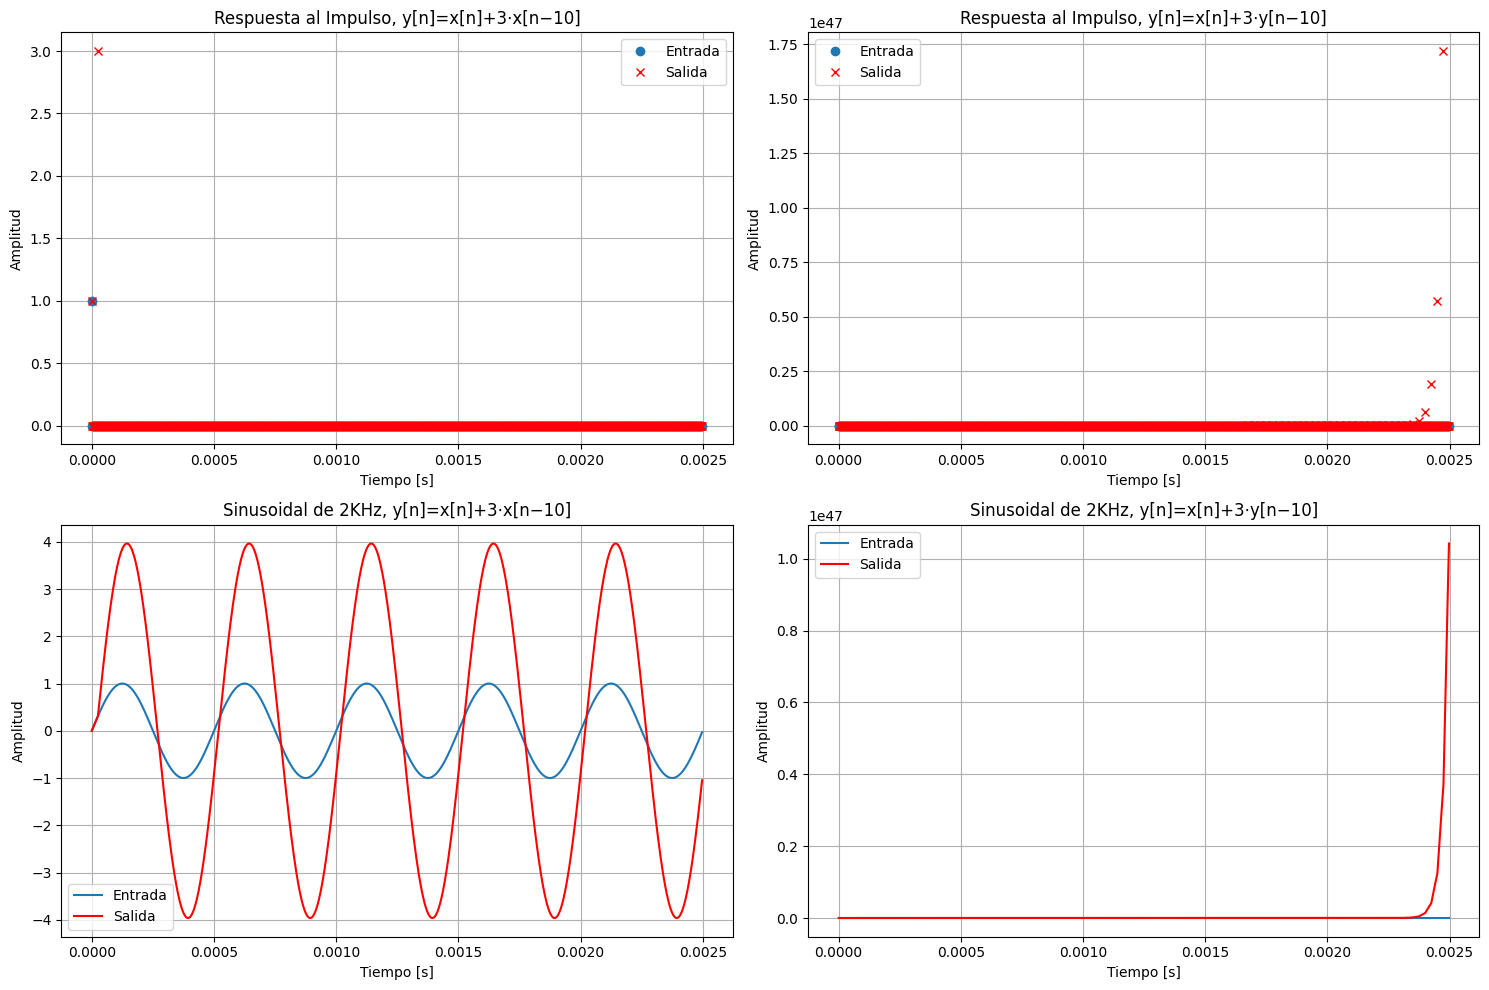

In [10]:
#y[n]=x[n]+3⋅x[n−10]
a2i = [0]
b2i = [1,0,0,0,0,0,0,0,0,0,3]

h2i = ec_diferencias(imp,a2i,b2i) #Rta al Impulso
Y2i = ec_diferencias(x1,a2i,b2i) #Sinusoidal

#y[n]=x[n]+3⋅y[n−10]
a2ii = [0,0,0,0,0,0,0,0,0,3]
b2ii = [1]

h2ii = ec_diferencias(imp,a2ii,b2ii) #Rta al Impulso
Y2ii = ec_diferencias(x1,a2ii,b2ii) #Sinusoidal

#Gráficos
plt.figure(10, figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(tt, imp, 'o',label='Entrada')
plt.plot(tt, h2i, 'x',label='Salida', color='red')
plt.title('Respuesta al Impulso, y[n]=x[n]+3⋅x[n−10]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(tt, x1, label='Entrada')
plt.plot(tt, Y2i, label='Salida', color='red')
plt.title('Sinusoidal de 2KHz, y[n]=x[n]+3⋅x[n−10]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(tt, imp, 'o', label='Entrada')
plt.plot(tt, h2ii, 'x', label='Salida', color='red')
plt.title('Respuesta al Impulso, y[n]=x[n]+3⋅y[n−10]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(tt, x1, label='Entrada')
plt.plot(tt, Y2ii, label='Salida', color='red')
plt.title('Sinusoidal de 2KHz, y[n]=x[n]+3⋅y[n−10]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Como fue mencionado anteriormente, en el primer caso, podemos observar claramente la respuesta al impulso esperada. En valor 0, observamos que la entrada ($\delta[0]$) toma valor 1, y que a la muestra $h[10]=\delta[10]+3\cdot\delta[10-10]=3$. También se puede ver de manera clara la entrada y salida de la sinusoidal. En base a lo esperado, las primeras muestras de $y[n]$ toman los mismos valores que la sinusoidal, y a partir del valor $y[10]$ se comienza a sumar el factor de $3\cdot x[n-10]$. De esta manera se obtiene una señal levemente desfasada de la original. 

En el caso de $y[n]=x[n]+3⋅y[n−10]$, no se puede analizar de manera gráfica la totalidad de las señales (1000 muestras), porque trabajamos con valores muy altos ($10^{47}$), por lo que para realizar un análisis adecuado voy a recortar las muestras a 50. 

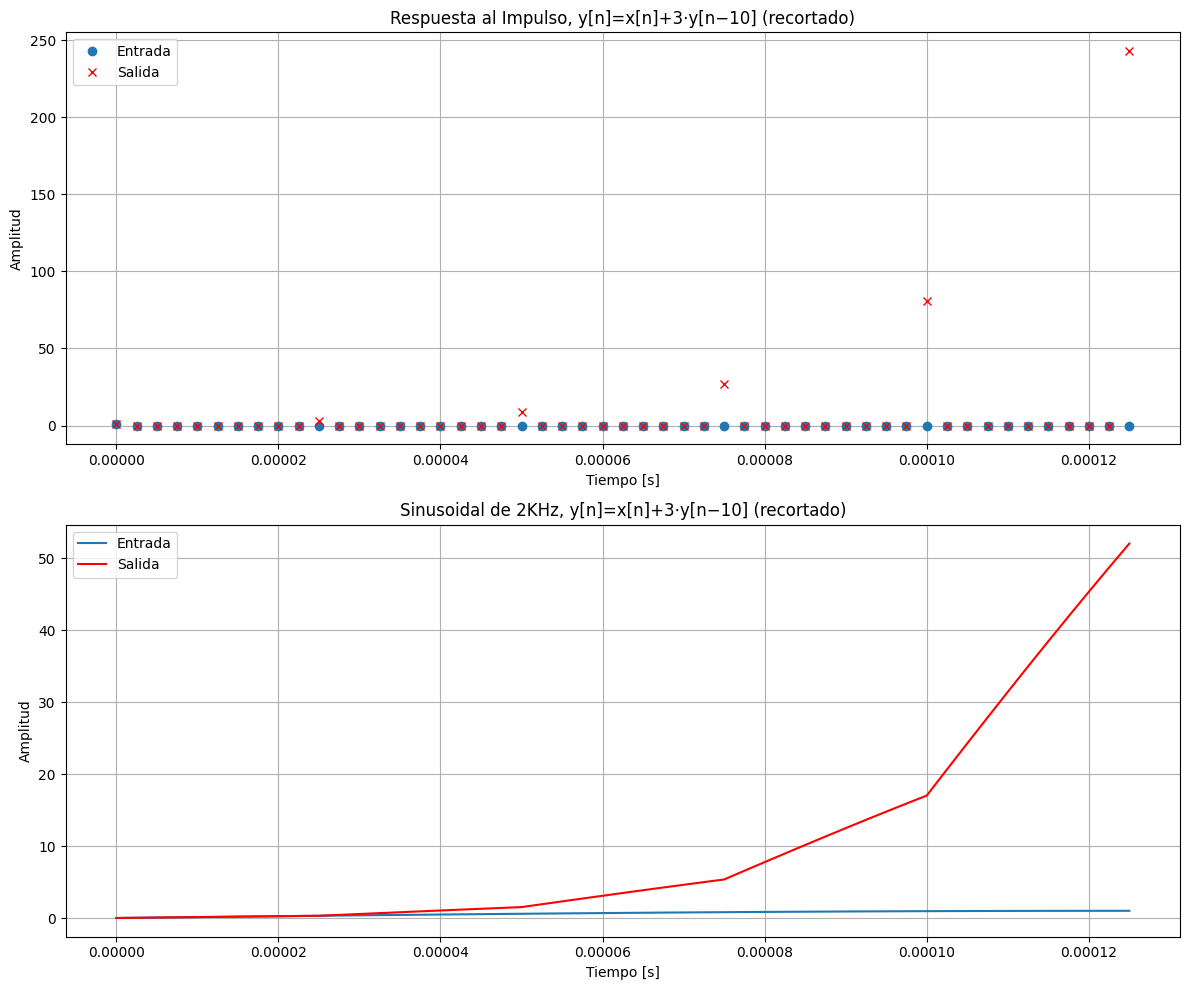

In [11]:
plt.figure(11, figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(tt[:51], imp[:51], 'o', label='Entrada')
plt.plot(tt[:51], h2ii[:51], 'x', label='Salida', color='red')
plt.title('Respuesta al impulso, y[n]=x[n]+3⋅y[n−10] (recortado)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tt[:51], x1[:51], label='Entrada')
plt.plot(tt[:51], Y2ii[:51], label='Salida', color='red')
plt.title('Sinusoidal de 2KHz, y[n]=x[n]+3⋅y[n−10] (recortado)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

En base a estos nuevos gráficos, se puede observar mejor el funcionamiento del sistema. En cuanto a la respuesta al impulso, se consiguieron los mismos resultados que se esperaban. Se observa un crecimiento exponencial de $3^x$ cada 10 muestras. La demostración para esto es simple; si ingreso como entrada $\delta[n]$, obtengo $h[n]$:

$$h[0] = \delta[0] + 3\cdot h[-10] = 1$$
$$h[1] = \delta[1] + 3\cdot h[-9] = 0$$ 

De este momento en adelante, los valores $\delta[n] = 0$, por lo que lo quito de la definición por comodidad.

$$h[2:9] = 0$$ 
$$h[10] = 3\cdot h[10-10] = 3\cdot h[0] = 3$$

Los valores intermedios entre 0 y 10 tienen valor nulo, por lo que $h[11:19] = 0$.

$$h[20] = 3\cdot h[20-10] = 3\cdot h[10] = 3\cdot3 = 9$$
$$h[30] = 3\cdot h[30-10] = 3\cdot h[20] = 3\cdot9 = 27$$
$$h[40] = 3\cdot h[40-10] = 3\cdot h[30] = 3\cdot27 = 81$$

Si sigo aumentando, cada 10 muestras el valor se multiplica por 3 de manera sucesiva. Es por ello que tenemos un crecimiento exponencial y los valores de la señal de 1000 muestras llegan a valores tan altos. En $h[n\cdot 10] = 3^n$, por lo que en el valor 990 tendríamos: $h[99 \cdot 10] = 3^{99} = 1.71 \cdot 10^{47}$, el último valor no nulo del primer gráfico.

En cuanto a la sinusoidal, se repite esta tendencia exponencial. De igual manera, podemos ver que, al igual que en la primera ecuación, en los primeros 10 valores copia a la señal original, lo que es esperado por la definición de la ecuación.

### Bonus
El modelo Windkessel describe la hemodinámica del sistema cardíaco en términos de la resistencia y compliancia vascular. La fórmula que describe este comportamiento se representa mediante la siguiente ecuación diferencial:

$$
C \cdot \frac{dP(t)}{dt} + \frac{1}{R} \cdot P(t) = Q(t)
$$

Siendo en la ecuación:

- P(t): Presión arterial en el tiempo.
- Q(t): Flujo de entrada al sistema.
- R: Resistencia periférica total (RVS). Es decir, la oposición que presentan los vasos sanguíneos a la circulación de la sangre.
- C: Compilancia arterial, la capacidad de las arterias de expandirse frente al aumento de la presión sanguínea.

Los valores de R y C varían según la edad y el estado fisiológico de la persona. Normalmente, la compliancia arterial llega a su valor máximo cerca de los 30 años y luego disminuye. Igualmente, utilizaré valores estándar para adultos sanos, por lo que tomo $R = 1 mmHg \cdot s/mL$ y $C = 1.5 mL/mmHg$. 

Por otro lado $Q(t)$ es una función del tiempo, que en este caso no conocemos, por lo que la tomamos como una constante. Los valores varían con la edad, al igual que R y C. Si nuevamente hablamos de un adulto sano que se encuentra en reposo, el gasto cardíaco promedio es de aproximadamente $80 mL/s$, pero estos valores aumentan con la actividad física, alcanzando el triple o quintuple de estos valores.

Una vez definidos los valores con los que trabajaremos, discretizamos la ecuación mediante el método de Euler. Para ello realizamos la siguiente aproximación:

$$
\frac{dP(t)}{dt} \approx \frac{P_{t+\Delta T} - P_t}{\Delta T}
$$

Al reemplazar en la ecuación obtengo:

$$
C \cdot \frac{P_{t+\Delta T} - P_t}{\Delta T} + \frac{1}{R} \cdot P_t = Q_t
$$

Y despejo $P_{t+\Delta T}$

$$
P_{t+\Delta T} = (Q_t - \frac{P_t}{R}) \cdot \frac{\Delta T}{C} + P_t = Q_t \cdot (\frac{\Delta T}{C}) + P_t \cdot (1 - \frac{\Delta T}{C \cdot R})
$$

De esta manera obtengo la ecuación discretizada. Ahora lo planteo digitalmente. Voy a utilizar $N = 1000$ y un $\Delta T = 0.001 s$. Reemplazando con los valores pactados anteriormente, obtenemos:

$$
P_{t+\Delta T} = Q_t \cdot (3/200 \frac{s \cdot mmHg}{mL}) + P_t \cdot (197/200)
$$

Utilizo la función anterior para ecuaciones en diferencias. Voy a plantear dos casos distintos:

- $Q(t) = Q_0 = 80 mL/s$, el flujo constante.
- $Q(t) = Q_0 + A \cdot sin(2\pi \cdot f \cdot t) = 80 mL/s + 25 mL/s \cdot  sin(2\pi \cdot 1.25 \frac{1}{s} \cdot t)$, lo que se asemeja más a la realidad porque el flujo cardíaco es pulsátil. f representa la frecuencia cardíaca (tomando como referencia 75 latidos por minuto).

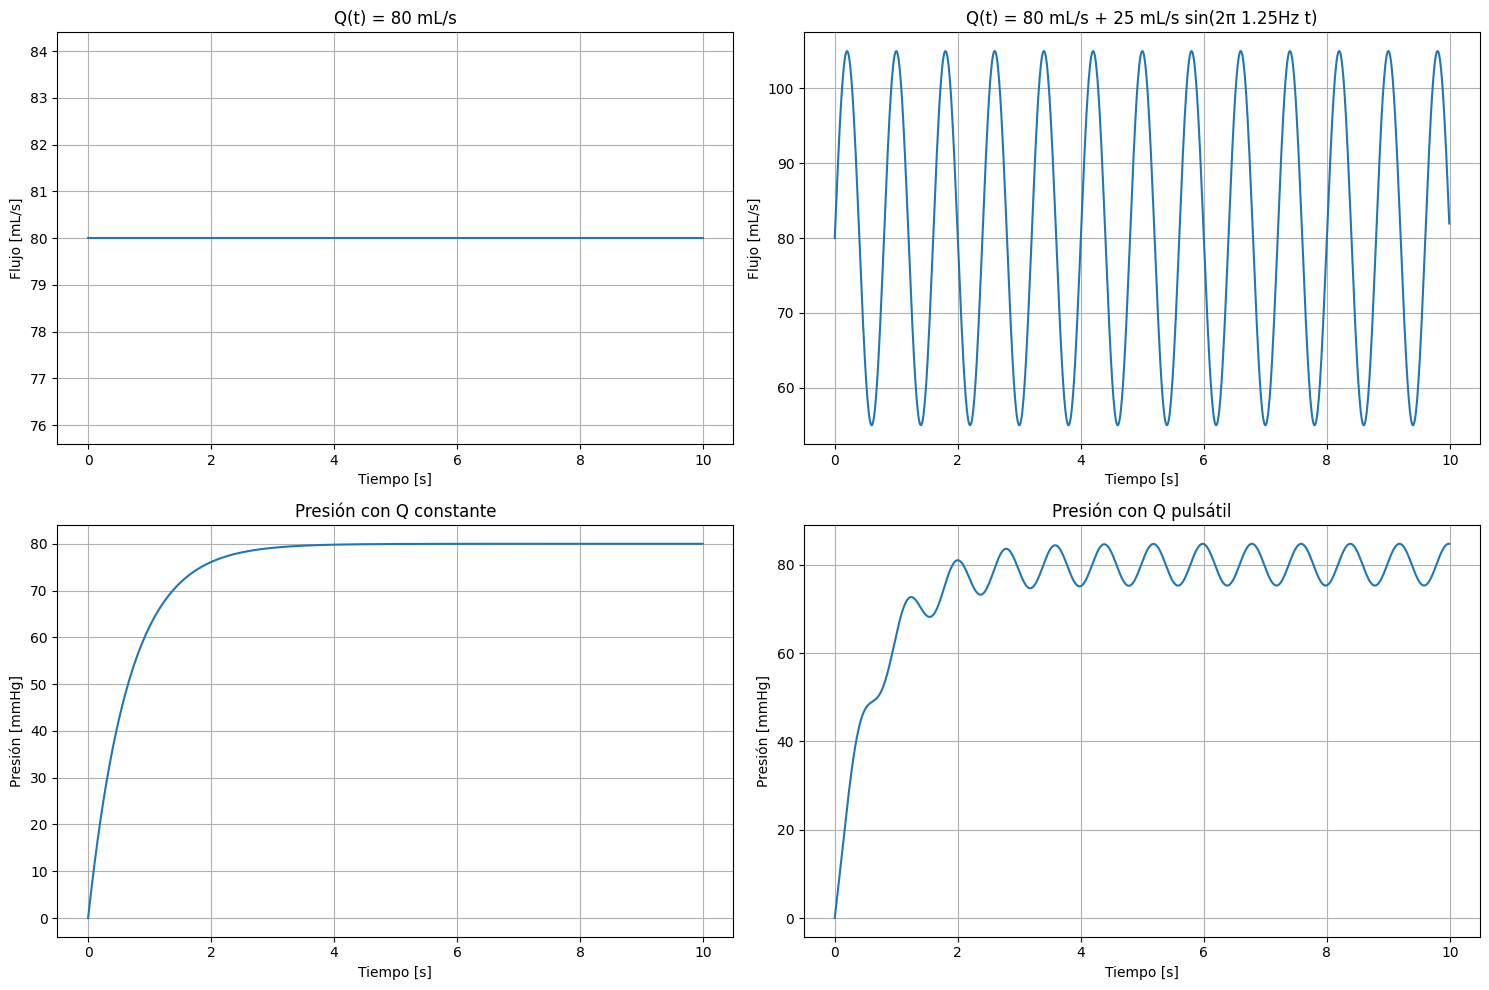

In [12]:
DeltaT = 0.01
Nb = 1000
t_sim = DeltaT * Nb
t_bonus = np.arange(start = 0, stop = t_sim, step = DeltaT)

Q = np.zeros(N)

#P[n] = 3/200 * Q[n-1] + 197/200 * P[n-1]

a_bonus = [197/200]
b_bonus = [0, 3/200]

## Si Q es cte en 80
Q[0:N] = 80

## Si Q es una función sinusoidal
t_2, Q2 = mi_funcion_sen(ff = 1.25, nn = N, amp = 25, dc = 80, fs = 1/DeltaT)

Pc = ec_diferencias(Q, a_bonus, b_bonus)
Ps = ec_diferencias(Q2, a_bonus, b_bonus)

plt.figure(12, figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(t_bonus, Q)
plt.title('Q(t) = 80 mL/s')
plt.xlabel('Tiempo [s]')
plt.ylabel('Flujo [mL/s]')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(t_2, Q2)
plt.title('Q(t) = 80 mL/s + 25 mL/s sin(2π 1.25Hz t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Flujo [mL/s]')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(t_bonus, Pc)
plt.title('Presión con Q constante')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión [mmHg]')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(t_2, Ps, label='Presión')
plt.title('Presión con Q pulsátil')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión [mmHg]')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Análisis de los resultados
Se puede observar que, en un principio, hasta que se estabiliza la señal, hay un gran crecimiento en ambos casos. Este comportamiento deriva directamente de asumir que $Q[n]$ y $P[n]$ son causales, cuando realmente no lo son. De esta forma, el primer valor que toma en ambos casos la ecuación en diferencias es cero. De esta forma, si se quiere analizar en un caso real, se debe analizar en un periodo de tiempo una vez que ya se estabiliza el sistema.

## Conclusiones
En conclusión, podemos decir que las ecuaciones presentadas a lo largo de este trabajo son efectivamente sistemas LTI. En un primer instante, se llevó a cabo el análisis de diversas señales de salida de nuestro sistema. Luego se obtuvo la respuesta al impulso, coincidiendo con los valores obtenidos analíticamente, y se aplicó el producto de convolución con algunas de las señales anteriores. Estos métodos arrojaron distintos resultados en cierta medida. Por un lado, la convolución devuelve un vector del doble de longitud que la salida en el caso de la ecuación en diferencias. Igualmente, si la salida se recorta a la longitud de la señal de entrada y los comparamos con los anteriores, los valores obtenidos coincidieron en su totalidad. 

Por otro lado, se logró reparar sobre las principales diferencias entre los sistemas FIR e IIR. Al incluir un término de recursividad, se observó la tendencia exponencial que tomó el sistema, ya que el factor multiplicativo era mayor que 1. En el caso de la respuesta al impulso, al igual que en el primer apartado, los valores obtenidos analítica y digitalmente coincidieron. 

Finalmente, se lograron trasladar efectivamente los conceptos tratados hacia el modelo fisiológico de Windkessel. Se llevó a cabo la discretización de una ecuación diferencial a una ecuación en diferencias y la ejecución de este modelo en Python para valores estándar. 

## Autoevaluación
Este segundo trabajo práctico me resultó menos complejo. Pude resolverlo de manera efectiva por mi cuenta, consultando con el libro de Holton los conceptos teóricos. Al hacer esta tarea logré incorporar los conceptos básicos y características esenciales de los sistemas LTI, un tema con el cual no estaba familiarizada. Me quedaron claros todos los conceptos vistos. Para llevar a cabo el trabajo, utilicé ChatGPT principalmente para comprender ciertos errores que no permitían correr el código en Spyder y para obtener los valores típicos para el modelo Windkessel. 

## Bibliografía
- Holton, T. (2021). *'DIGITAL SIGNAL PROCESSING: Principles and Applications'*, Cambridge University.
- Westerhof, N., Lankhaar, J. y Westerhof, B. (febrero 2009) *'El Windkessel arterial'*, National Library of Medicine. [URL](https://pubmed.ncbi.nlm.nih.gov/18543011/)